# 스택2 목차
- 계산기 1
- 계산기 2
- 백트래킹
- [참고] 가지치기
- 분할정복

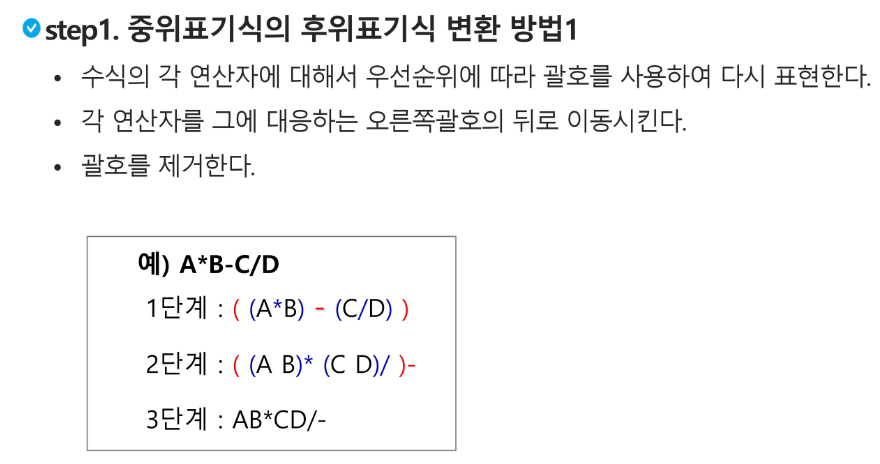

- 2+3*4/5 = 234*5/+
- 2+3*4+5 = 234*+5+ (같은 등급이면 뒤에거 먼저)
- 2+3*4+5/2 = 234*+52/+



### 중위표기에서 후위표기로
- 여는 괄호('(')) -> +,- -> *,/
- 모든 연산자는 스택에 한 번 들어왔다 나감
- 여는 괄호는 무조건 스택에 넣음
- 닫는 괄호가 나오면 여는 괄호가 나올 때까지 사이에 있는 연산자들을 순서대로 쭉 빼서 출력함
- 우선순위가 같을 때는 꼭대기에 있는 걸 빼줌

### 후위표기 전환
- 반대로 뽑아 올 땐 위에있는 피연산자(숫자)는 스택에 넣고
- 연산자가 나오면 위에거가 뒤로가게 숫자를 pop 해옴
- 만약 스택에 숫자가 남아있으면 비정상
- 스택이 비어있어야 정상 종료


### 문제 풀 때
- 정수로 값을 받기
- 소수점 어떻게 처리하는지 확인


# 백트래킹
- 재귀관련해선 D2 11611_배열최소합 보기
- 백트래킹(Backtracking) 기법은 해를 찾는 도중에 '막히면' (즉, 해가 아니면) 되돌아가서 다시 해를 찾아 가는 기법이다.
- 백트래킹 기법은 최적화(optimization) 문제와 결정(desicion) 문제를 해결할 수 있다.
- 결정 문제 : 문제의 조건을 만족하는 해가 존재하는지의 여부를 'yes' 또는 'no'가 답하는 문제
  - 미로 찾기, n-Queen, Map coloring, 부분 집합의 합(Subset Sum) 문제 등


### 백트래킹과 깊이 우선 탐색과의 차이
- 어떤 노드에서 출발하는 경로가 해결책으로 이어질 것 같지 않으면 더 이상 그 경로를 따라가지 않음으로써 시도의 횟수를 줄임(Prunning 가지치기)
- 깊이우선탐색이 모든 경로를 추적하는데 비해 백트래킹은 불필요한 경로를 조기에 차단.
- 깊이우선탐색을 가하기에는 경우의 수가 너무나 많음. 즉, N! 가지의 경우의 수를 가진 문제에 대해 깊이우선탐색을 가하면 당연히 처리 불가능한 문제.
- 백트래킹 알고리즘을 적용하면 일반적으로 경우의 수가 줄어들지만 이 역시 최악의 경우에는 여전히 지수함수 시간(Exponential time)을 요하므로 처리 불가능

### 백트래킹 기법
- 모든 후보를 검사하는 것? NO
- 어떤 노드의 유망성을 점검한 후에 유망하지 않다(뒤를 더 볼 필요가 없다)고 결정되면 그 노드의 부모로 되돌아가 다음 자식 노드로 감
- 어떤 노드를 방문하였을 때 그 노드를 포함한 경로가 해답이 될 수 없으면 그 노드는 유망하지 않다고 하며, 반대로 해답의 가능성이 있으면 유망하다고 함
- 가지치기(pruning) : 유망하지 않는 노드가 포함되는 경로는 더 이상 고려하지 않는다.

### 절차
  1. 상태 공간 트리의 깊이우선탐색을 실시한다.
  2. 각 노드가 유망한지를 점검한다.
  3. 만일 그 노드가 유망하지 않으면, 그 노드의 부모 노드로 돌아가서 검색을 계속한다.

### 미로 찾기
- 아래 그림과 같이 입구와 출구가 주어진 미로에서 입구부터 출구까지의 경로를 찾는 문제이다.
- 이동할 수 있는 방향은 4방향으로 제한한다. 대각선 안됨
</br>

  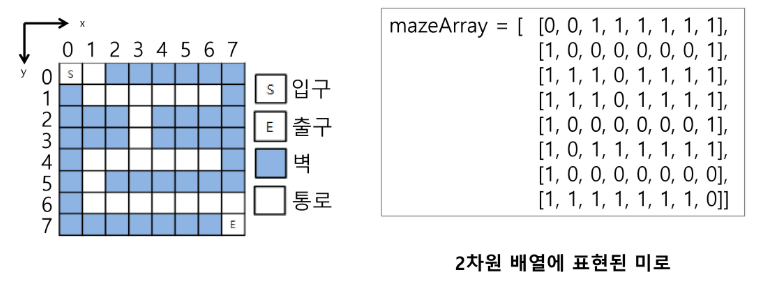  
  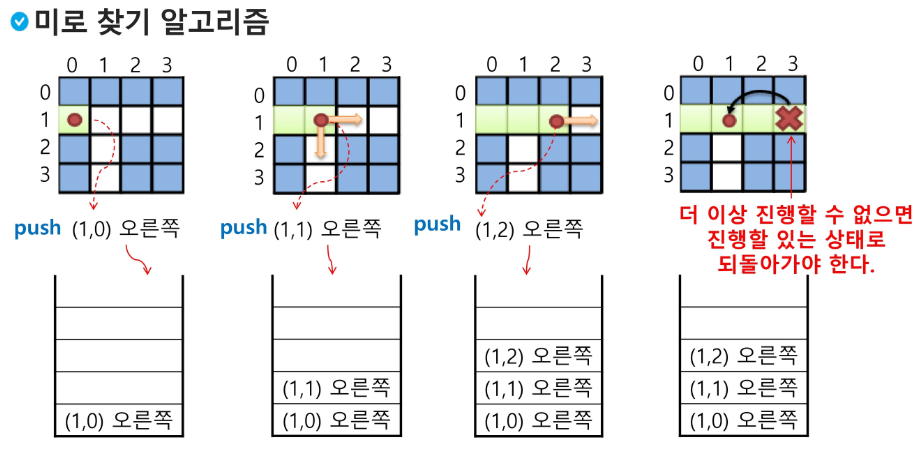

</br>

  - 내가 갈 수 있는 곳을 찾아서 어디로 갈 수 있는지 정리해둠
  - 막혔을 때 돌아올 수 있도록 지나온 경로를 기록함


  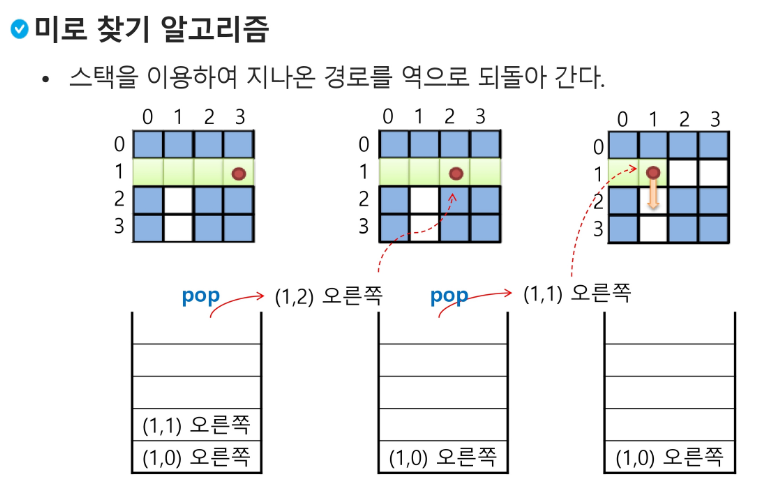  
  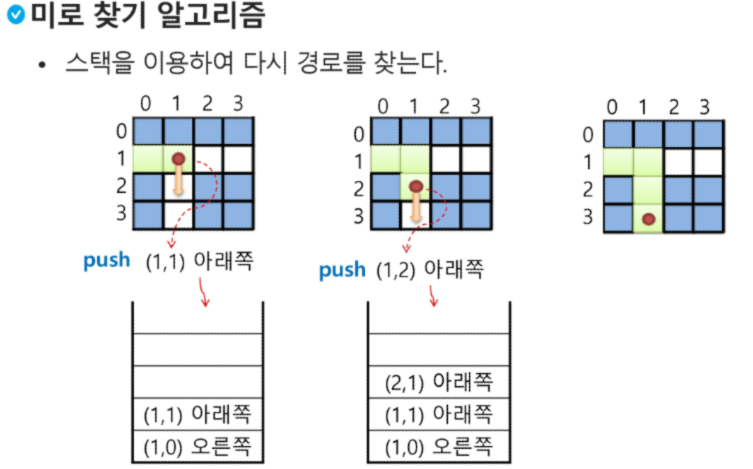


### 일반 백트래킹 알고리즘

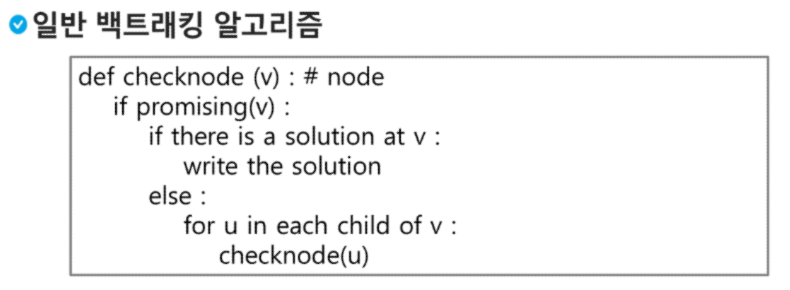


1) i 행에 둠
2) i+1 행에 두기 전 둬도 괜찮은지 확인함


### 상태 공간 트리

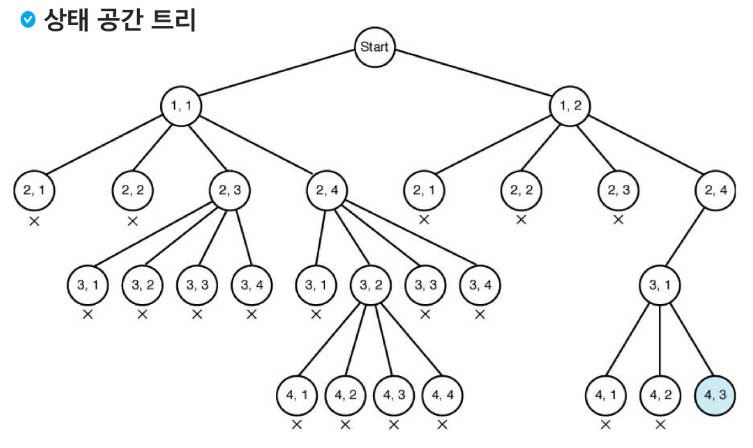

In [1]:
# 4875. [파이썬 S/W 문제해결 기본] 5일차 - 미로
# 테두리 벽을 뚫고 갈 수 있는지 봐야함
# 미로를 어떻게 저장할 지 생각하기

def dfs2(i,j,N) :       #재귀
    visited[i][j] = 1   #갈 수 있는 곳에 가면 방문 도장
    if maze[i][j] == 3:
        return 1
    else :
        for di, dj in [[0,1],[1,0],[0,-1],[-1,0]] :
            ni, nj = i+di, j+dj
            if 0 <= ni < N and 0 <= nj < N and maze[ni][nj] != 1 and visited[ni][nj] == 0 :
                if dfs2(ni,nj,N) :
                    return 1
        return 0

        # 유망함 확인, 벽이 아닌지 확인, 

def fstart(N) :
    for i in range(N) :
        for j in range(N) :
            if maze[i][j] == 2:
                return i, j
    return -1, -1

T = int(input())
for tc in range(1,T+1) :
    N = int(input())
    maze = [list(map(int,input())) for _ in range(N)]

    # 출발 위치 찾기
    sti, stj = fstart(N)

    visited = [[0]*N for _ in range(N)]
    print(f'#{tc} {dfs2(sti,stj,N)}')


SyntaxError: invalid syntax (3877409060.py, line 1)

# 교수님 정리

### 최적화
- 최적화 문제란 최적해를 찾는 문제
- 최적해 : 가능한 후보해들 중에서 조건에 해당하는 값이 최대 혹은 최소인 후보
- 완전탐색 : 순열, 조합, 부분집합 등 모든 가능한 경우를 탐색하기 때문에 시간이 오래걸림
  - 그래서 백트래킹과 동적계획법이 나옴! (완전 탐색을 효율적으로 수행하기 위한 방법)

### 백트래킹
- 상태 공간 트리를 가지치기를 이용해 보다 효율적으로 탐색하는 것
- 탐색 시 깊이우선방식이나 너비우선방식을 사용함
- 가지치기를 하기 때문에 일반적으로 깊이우선방식이 더 많이 사용됨

### 동적계획법
- 점화식(문제간의 관계) + 메모이제이션


### 탐욕 알고리즘 == 환상적
- 모든 경우의 수를 따지지 않고 최적해를 찾아줌